In [1]:

import time
import pandas as pd
import glob
import numpy as np
import timeit
import pickle

from multiprocessing import Pool
from matplotlib import pyplot as plt
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

# import matplotlib.pyplot as plt

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
#matplotlib.rcParams.update({'font.size': 18})

path_dicts='/mnt/sdb1/sandeep/dicts_chess/'

In [2]:
t_ic=time.time()

YEAR_OF_PGN=2013

file_to_read = open(path_dicts+"dict_merged_"+str(YEAR_OF_PGN)+".pkl", "rb")
dict_career_MAIN= pickle.load(file_to_read)

t_oc=time.time();
print(t_oc-t_ic,' seconds')

17.052056550979614  seconds


In [3]:
t_ic=time.time()

for YEAR_OF_PGN in range(2014,2017):

    file_to_read = open(path_dicts+"dict_merged_"+str(YEAR_OF_PGN)+".pkl", "rb")
    dict_career= pickle.load(file_to_read)


    it_career=0
    LL=len(dict_career.keys())
    for key_ in dict_career.keys():
        it_career=it_career+1
        career_=dict_career[key_]

        if key_ in dict_career_MAIN.keys():
            dict_career_MAIN[key_]=dict_career_MAIN[key_]+career_
        else:
            dict_career_MAIN[key_]=career_            
#             dict_career_MAIN.setdefault(key_, []).append(career_)

        if it_career % 20000 == 0:
            t_oc = time.time();
            print('YEAR=',YEAR_OF_PGN,'-----',it_career/LL)
            with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_PROG_MERGIN_ALL_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
                file_object.write('Y='+str(YEAR_OF_PGN)+'--'+str(it_career/LL)+'--i.e.-'+str(it_career)+'/'+str(LL)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

# print(t_oc-t_ic)
#----------------------------------------------------
# Writing dictionary to file 
#----------------------------------------------------       
with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_PROG_MERGIN_ALL_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
    file_object.write('writing dict to file ------------\n')

file_write=path_dicts+"dict_CHESS_CAREERS_ALL_YEARS"+".pkl"
with open(file_write, 'wb') as f:
    pickle.dump(dict_career_MAIN, f, pickle.HIGHEST_PROTOCOL)
    
with open("/mnt/sdb1/sandeep/0. Careers in chess/0.z_PROG_MERGIN_ALL_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
    file_object.write('done writing dict to file ------------\n')

t_oc=time.time();
print(t_oc-t_ic,' seconds')

YEAR= 2014 ----- 0.10821222581727284
YEAR= 2014 ----- 0.21642445163454568
YEAR= 2014 ----- 0.3246366774518185
YEAR= 2014 ----- 0.43284890326909137
YEAR= 2014 ----- 0.5410611290863642
YEAR= 2014 ----- 0.649273354903637
YEAR= 2014 ----- 0.7574855807209099
YEAR= 2014 ----- 0.8656978065381827
YEAR= 2014 ----- 0.9739100323554555
YEAR= 2015 ----- 0.06985947766068554
YEAR= 2015 ----- 0.13971895532137107
YEAR= 2015 ----- 0.20957843298205658
YEAR= 2015 ----- 0.27943791064274215
YEAR= 2015 ----- 0.34929738830342766
YEAR= 2015 ----- 0.41915686596411317
YEAR= 2015 ----- 0.48901634362479873
YEAR= 2015 ----- 0.5588758212854843
YEAR= 2015 ----- 0.6287352989461698
YEAR= 2015 ----- 0.6985947766068553
YEAR= 2015 ----- 0.7684542542675409
YEAR= 2015 ----- 0.8383137319282263
YEAR= 2015 ----- 0.9081732095889119
YEAR= 2015 ----- 0.9780326872495975
YEAR= 2016 ----- 0.03503958597225215
YEAR= 2016 ----- 0.0700791719445043
YEAR= 2016 ----- 0.10511875791675646
YEAR= 2016 ----- 0.1401583438890086
YEAR= 2016 ----- 

## Checking if careers are stored correctly as lists at this step

In [ ]:
cc=0
store_issues=[]
for key_ in dict_career:
    cc=cc+1; 
    career_=dict_career[key_]
    issues_=([int(isinstance(elem[0], list)) for elem in career_])
    store_issues.append(sum(issues_))

#     if cc>0: 
#         break;
#         

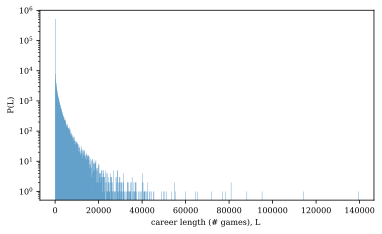

In [5]:

career_len=[]
cc=0
for key_ in dict_career:
    career_len.append(len((dict_career_MAIN[key_])))
#     cc=cc+1; 
#     if cc>10: break;

fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);
ax.hist(career_len,1000);

# ax.legend(store_lines,leg_,loc=(1.04,0));
ax.set(xlabel="career length (# games), L ", ylabel='P(L)');
ax.set_yscale('log',base=10)

# ax.set_xticks(xtick_s)
# ax.set_xlim(1,100);

In [13]:
career_len=np.array(career_len)
ind=np.where(career_len>100)
print(len(ind[0]),len(career_len))

51945 570783


In [14]:
cc=0;
for key_ in dict_career.keys():
    print(key_); cc=cc+1
    if cc>5:    break

claudiomat
MisterBiggStuff
journal
Kiriush33
fuku
AlgeriaCZL


In [15]:
dict_career['claudiomat']

[['Rated Bullet game',
  '60+0',
  'claudiomat',
  'MisterBiggStuff',
  '0-1',
  '2013.12.31',
  '23:00:14',
  '1711',
  '2035',
  'Old Benoni Defense',
  '1. d4 c5 2. e3 cxd4 3. exd4 d5 4. c3 Nc6 5. f4 e5 6. Nf3 e4 7. Ne5 f6 8. Qh5+ g6 9. Nxg6 hxg6 10. Qxh8 Kf7 11. Qh7+ Bg7 12. f5 g5 13. h4 gxh4 14. Bh6 Qf8 15. Rxh4 Nxh6 16. Rxh6 Ne7 17. Rh3 Bxf5 18. Qh4 Bxh3 19. Qxh3 Qh8 20. Qd7 Qh4+ 21. Kd2 Bh6+ 22. Kc2 Qf2+ 23. Nd2 Qxd2+ 24. Kb3 e3 0-1\n'],
 ['Rated Bullet game',
  '60+0',
  'claudiomat',
  'mateurdu75',
  '0-1',
  '2013.12.31',
  '23:02:56',
  '1707',
  '2073',
  'Horwitz Defense',
  '1. d4 e6 2. e3 d5 3. Bd3 Nf6 4. Nd2 Be7 5. f4 O-O 6. Ngf3 c5 7. c3 c4 8. Bc2 Nc6 9. O-O b5 10. Ne5 Nxe5 11. fxe5 Nd7 12. Rf3 f5 13. exf6 Nxf6 14. Rff1 Bd6 15. e4 dxe4 16. Nxe4 Nxe4 17. Bxe4 Rxf1+ 18. Qxf1 Rb8 19. Qe2 Qh4 20. g3 Bxg3 21. hxg3 Qxg3+ 22. Qg2 Qe1+ 23. Kh2 e5 24. Bd5+ Kh8 25. dxe5 Rb6 26. e6 Bxe6 27. Bxe6 Rxe6 28. Qa8+ Re8 29. Qf3 Qh4+ 30. Qh3 Re2+ 31. Kg1 0-1\n'],
 ['Rated Bullet game',
